In [ ]:
import xymass
import numpy as np
import scipy
%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
n_object=100000

#draw sample from specified density profile, r_scale must be specified in units of A.U.
r2d=xymass.sample_r2d(size=n_object,model='plum',r_scale=100.) 

#draw sample from specified mass function
mf=xymass.sample_imf(size=n_object,model='kroupa')

'''add binary companions according to specified binary fraction and either Raghavan etal. 2010 \
or Duquennoy & Mayer(1991) parameters'''

r2d_with_binaries_raghavan=xymass.add_binaries(r2d.r_xyz,mf.mass,f_binary=0.32,binary_model='Raghavan2010')
r2d_with_binaries_dm91=xymass.add_binaries(r2d.r_xyz,mf.mass,f_binary=0.32,binary_model='DM91')

'''add binary companions according to mass ratio, period and eccentricity distributions sampled by the user'''

q=np.random.uniform(size=n_object,low=0.1/mf.mass,high=1.) #array of m_secondary / m_primary, sampled from uniform distribution subject to constraint M_2 > 0.1 Msun
period=10.**xymass.sample_normal_truncated(size=n_object,loc=5.03,scale=2.28,min_value=-np.inf,max_value=np.inf)/364.25 #array of orbital period (years), sampled from truncated log-normal distribution
eccentricity=xymass.sample_normal_truncated(size=n_object,loc=0.31,scale=0.17,min_value=0.,max_value=1.)
    
r2d_with_binaries_user=xymass.add_binaries(r2d.r_xyz,mf.mass,f_binary=0.32,q=q,period=period,eccentricity=eccentricity) 

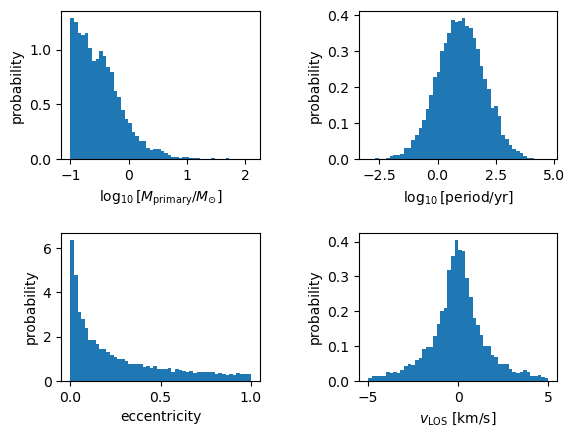

In [4]:
fig=plt.figure(1)
ax1=fig.add_subplot(221)
ax2=fig.add_subplot(222)
ax3=fig.add_subplot(223)
ax4=fig.add_subplot(224)
fig.subplots_adjust(wspace=0.5,hspace=0.5)
ax1.hist(np.log10(mass_primary),bins=50,density=True)
ax2.hist(np.log10(period),bins=50,density=True)
ax3.hist(eccentricity,bins=50,density=True)
ax4.hist(orbit_snapshot.v_obs_xyz.T[2],bins=50,density=True,range=[-5,5])
ax1.set_xlabel(r'$\log_{10}[M_{\rm primary}/M_{\odot}]$')
ax2.set_xlabel(r'$\log_{10}[\mathrm{period/yr}]$')
ax3.set_xlabel('eccentricity')
ax4.set_xlabel(r'$v_{\rm LOS}$ [km/s]')
for ax in [ax1,ax2,ax3,ax4]:
    ax.set_ylabel('probability')
plt.show()